Colonnes détectées : ['Semaine', 'Nombre de cas de consultation', 'Inc Low', 'Inc Up', 'nombre de cas de consultation pour 100,000 habitants', 'Inc100 Low', 'Inc100 Up', 'Code Insee', 'Région', 'Numero semaine', 'geom', 'geo_point_2d']
Nombre de périodes annuelles valides : 40

 Année avec l’épidémie la plus forte : 2010
Année avec l’épidémie la plus faible : 2020

--- Incidences annuelles triées (valeurs les plus fortes en haut) ---
2010    158674
2016    155094
2014    150482
1992    125228
2022    119989
2017    119622
2015    119371
2013    116843
1999    113627
2004    112928
dtype: int64


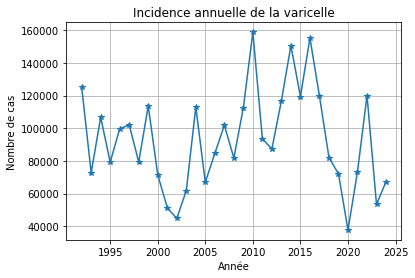

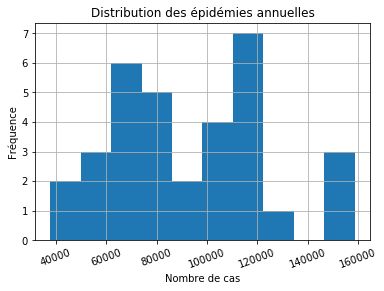

In [11]:
import pandas as pd
from isoweek import Week
import matplotlib.pyplot as plt

filename = "surveillance-epidemiologique-varicelle.csv"
colonnes = [
    'Semaine',
    'Nombre de cas de consultation',
    'Inc Low',
    'Inc Up',
    'nombre de cas de consultation pour 100,000 habitants',
    'Inc100 Low',
    'Inc100 Up',
    'Code Insee',
    'Région',
    'Numero semaine',
    'geom',
    'geo_point_2d'
]

df = pd.read_csv(filename, sep=';', header=None, names=colonnes, encoding='utf-8', skiprows=1)

df.columns = df.columns.str.strip()
print("Colonnes détectées :", list(df.columns))

df.rename(columns={
    'Numero semaine': 'week',
    'Nombre de cas de consultation': 'inc'
}, inplace=True)

raw_data = df[['week', 'inc']].dropna().copy()

raw_data['week'] = raw_data['week'].astype(str)
raw_data['inc'] = pd.to_numeric(raw_data['inc'], errors='coerce')
raw_data = raw_data.dropna()

import pandas as pd
from isoweek import Week

def convert_week(year_week):
    year = int(str(year_week)[:4])
    week = int(str(year_week)[4:])
    w = Week(year, week)
    return pd.Period(w.monday(), freq='W')

raw_data['period'] = [convert_week(w) for w in raw_data['week']]
raw_data = raw_data.set_index('period').sort_index()

first_september_week = [pd.Period(pd.Timestamp(year=y, month=9, day=1), freq='W') for y in range(1985, raw_data.index[-1].year)]
print("Nombre de périodes annuelles valides :", len(first_september_week))

yearly_incidence = []
years = []

for w1, w2 in zip(first_september_week[:-1], first_september_week[1:]):
    one_year = raw_data.loc[w1:w2 - 1]
    if abs(len(one_year) - 52) < 2: 
        yearly_incidence.append(one_year['inc'].sum())
        years.append(w2.year)

incidence_series = pd.Series(data=yearly_incidence, index=years)

print("\n Année avec l’épidémie la plus forte :", incidence_series.idxmax())
print("Année avec l’épidémie la plus faible :", incidence_series.idxmin())
print("\n--- Incidences annuelles triées (valeurs les plus fortes en haut) ---")
print(incidence_series.sort_values(ascending=False).head(10))

incidence_series.plot(title="Incidence annuelle de la varicelle", style='*-')
plt.xlabel("Année")
plt.ylabel("Nombre de cas")
plt.grid(True)
plt.show()

incidence_series.hist(xrot=20)
plt.title("Distribution des épidémies annuelles")
plt.xlabel("Nombre de cas")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()